# Introduction PyTorch

* machine learning with using `tensor`
* machine leanring with using `tensor`

We will use a polynomial function to approximate the following function:

$$y = \sin(x) \ \ x \in (-\pi, \pi)$$

We will construct a polynominal function:

$$y' = a + bx + cx^2 + dx^3$$

and try to esimate the coefficients $a, b, c, d$ to minimize:

$$L = (y'-y)^2 = [a + bx + cx^2 + dx^3 - \sin(x)]^2$$

The gradient descent gives us


\begin{aligned}
\frac{\partial L}{ \partial a} & = 2 \cdot (y'-y) \cdot \frac{y'}{a} = 2 \cdot (y'-y) \\
\frac{\partial L}{ \partial b} & = 2 \cdot (y'-y) \cdot \frac{y'}{b} = 2 \cdot (y'-y) \cdot x  \\
\frac{\partial L}{ \partial c} & = 2 \cdot (y'-y) \cdot \frac{y'}{c} = 2 \cdot (y'-y) \cdot x^2 \\
\frac{\partial L}{ \partial d} & = 2 \cdot (y'-y) \cdot \frac{y'}{d} = 2 \cdot (y'-y) \cdot x^3
\end{aligned}

The update rule is

$$\theta = \theta - \alpha \frac{L}{\theta}$$

We will set different learning rate and iteration to check the effect of those
parameters. 

A learning rate that is too large can cause the model to converge too quickly to a suboptimal solution, whereas a learning rate that is too small can cause the process to get stuck. 

![learning-rate](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png)

In [5]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import torch
sns.set_theme(context='notebook', style='darkgrid')
from ml_illustration import MlExample
%reload_ext autoreload

## Training a model without GPU

The training time is: 0.132 seconds
Result: y = -0.04238407530278376 + 0.835264355717464 x + 0.007311958263787501 x^2 + -0.09027554573305958 x^3


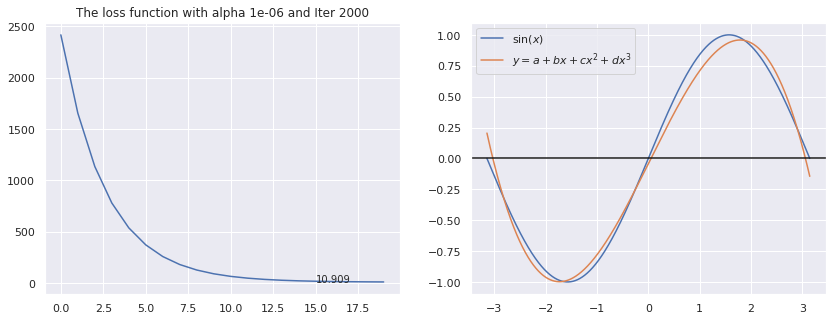

In [12]:
np.random.seed(176)
ml = MlExample()
ml.train_model1(1e-6, 2000)
ml.plot_results()

The training time is: 5.331 seconds
Result: y = 0.8415926490405949 + 0.4466639452857055 x + -0.46400496316159756 x^2 + -0.035000521311288404 x^3 + 0.04487462595592955 x^4


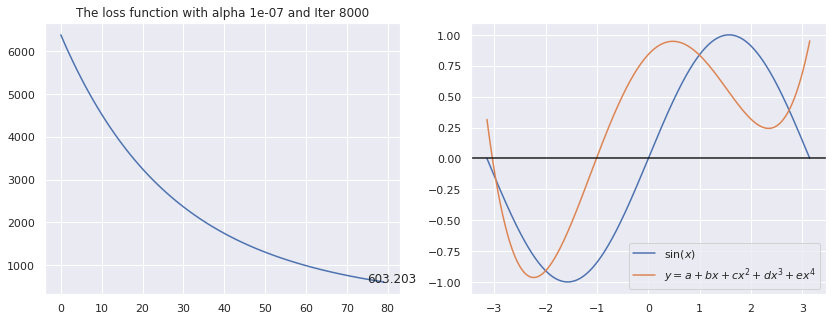

In [29]:
ml.train_model2(1e-7, 8000)
ml.plot_results()

The training time is: 6.658 seconds
Result: y = -0.254343600587253 + 0.6447029304989954 x + 0.13991845859270924 x^2 + -0.06316984241922304 x^3 + -0.01352124229040049 x^4


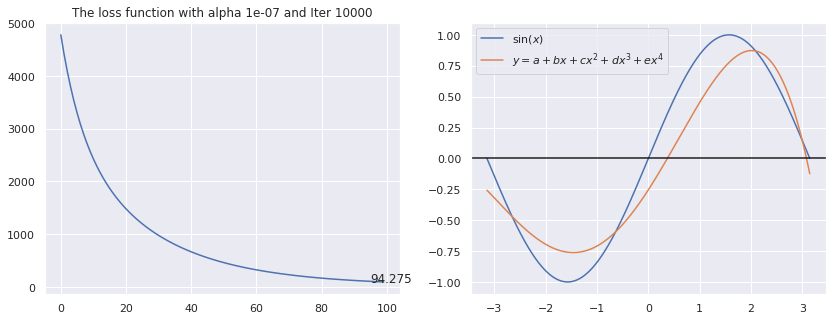

In [30]:
ml.train_model2(1e-7, 10000)
ml.plot_results()

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/root/ESL/ch0/ml_illustration.py:132: RuntimeWarning: overflow encountered in square
  d -= learning_rate * grad_d
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/root/ESL/ch0/ml_illustration.py:150: RuntimeWarning: invalid value encountered in double_scalars
  ax[1].plot(self.x, self.pred, label=r"$y = a+bx+cx^2+dx^3+ex^4$")


The training time is: 4.945 seconds
Result: y = nan + nan x + nan x^2 + nan x^3 + nan x^4 + nan x^5


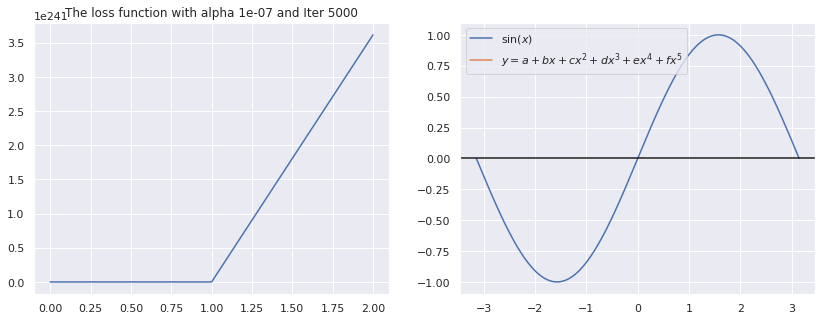

In [31]:
ml.train_model3(1e-7, 5000)
ml.plot_results()

The training time is: 4.891 seconds
Result: y = -0.14033826321325324 + 0.11619704504903053 x + 1.4092617604433244 x^2 + 0.3708400103703527 x^3 + -0.18108901930849855 x^4 + -0.04543122357441472 x^5


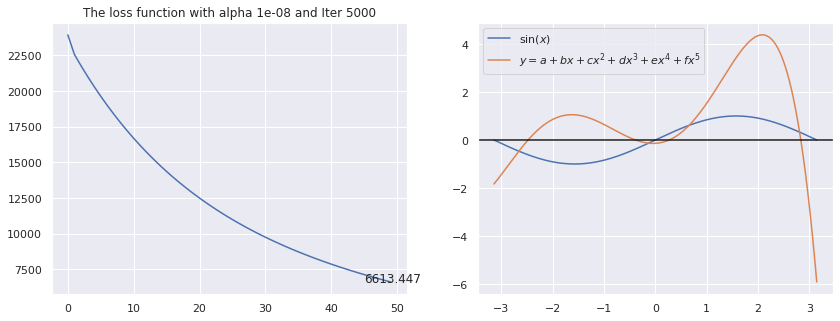

In [32]:
ml.train_model3(1e-8, 5000)
ml.plot_results()

The training time is: 2.354 seconds
Result: y = 1.5074591974361329 + -0.8340348406460197 x + -0.8411738927597342 x^2 + 0.5122862985278899 x^3 + 0.08168920061380472 x^4 + -0.04761013145194911 x^5


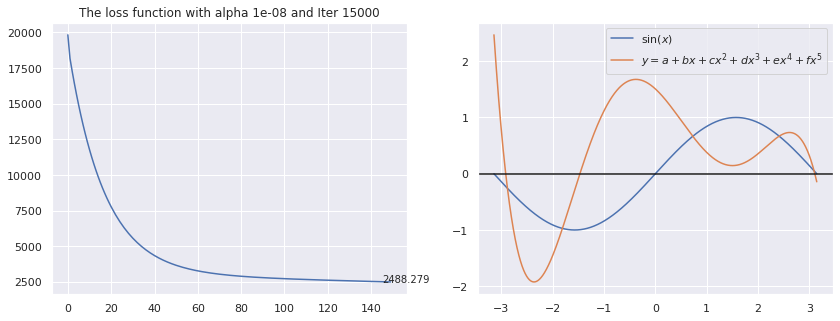

In [13]:
ml.train_model3(1e-8, 15000)
ml.plot_results()

The training time is: 3.907 seconds
Result: y = -0.38330619663820115 + 0.2503850014022449 x + 0.0257510442330273 x^2 + 0.11876534731186587 x^3 + 0.003751493161430441 x^4 + -0.016386059995125737 x^5


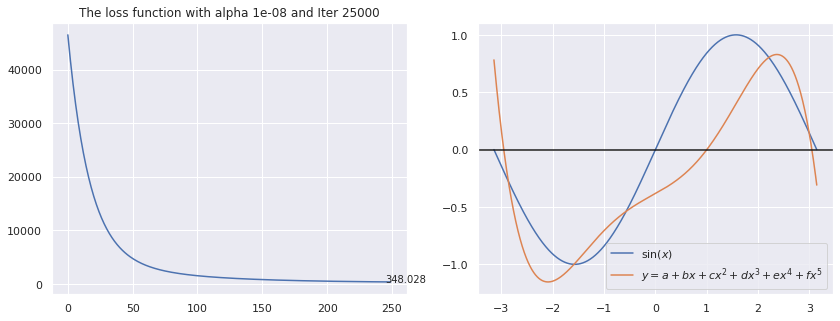

In [14]:
ml.train_model3(1e-8, 25000)
ml.plot_results()

## Training a model with GPU

In [1]:
import torch
torch.cuda.is_available()

True

In [30]:
!nvidia-smi

/bin/bash: /home/zou/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Tue Aug  9 12:03:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.141.03   Driver Version: 470.141.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:09:00.0 Off |                  N/A |
|  0%   49C    P8    38W / 350W |  23603MiB / 24258MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----

In [2]:
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

1
NVIDIA GeForce RTX 3090


The training time is: 8.07 seconds
Result: y = 0.7851768732070923 + -0.39082539081573486 x + -0.5074329972267151 x^2 + 0.3586355745792389 x^3 + 0.05158150941133499 x^4 + -0.03573811426758766 x^5


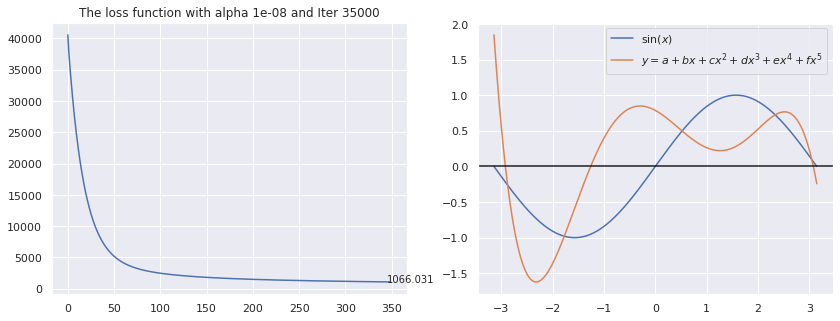

In [8]:
torch.manual_seed(176)
ml.train_with_gpu(1e-8, 35000)
ml.plot_results(gpu=True)


The training time is: 32.685 seconds
Result: y = 0.4878879189491272 + -1.399412989616394 x + -0.24654477834701538 x^2 + 0.7346420288085938 x^3 + 0.023088673129677773 x^4 + -0.06601735204458237 x^5


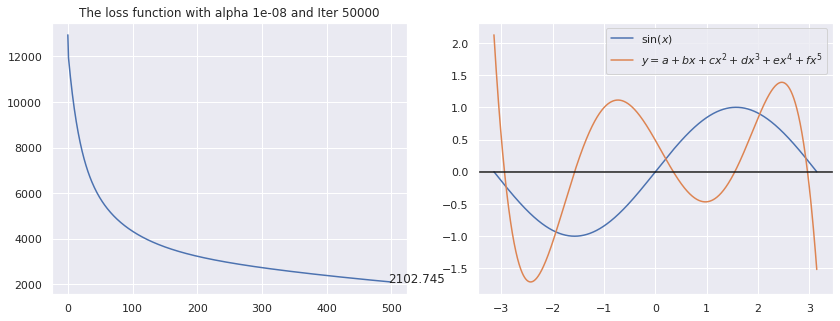

In [57]:
ml.train_with_gpu(1e-8, 50000)
ml.plot_results(gpu=True)

## Take away

* having a good model is very important
* learning rate and intial weights matter a lot
* GPU does speed up the training of a model
* GPU only helps when your model, learning rate and initial weights are 'right' 
* for image models, GPU usually works better